In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

Warmup questions:
- What does each column of X˜ represent? 1 is w0, 2 is input variable
- What does each row of X˜ represent? samples
- Why do we have 1’s in X˜ ? because it is to compensate for w0
- If we have heights and weights of 3 people, what would be the size of y and X˜ ? What would X˜
32 represent?  y(3,1) X(3,2)
- In helpers.py, we have already provided code to form arrays for y and X˜ . Have a look at the code, and
make sure you understand how they are constructed. ok
- Check if the sizes of the variables make sense (use functions shape).



In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

$L(w) = e^2/2N$


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w, mae=False):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    N = tx.shape[0]
    if mae:
        print(w)
        e = y - tx @ np.asarray(w)
        loss = np.sum(abs(e)) / (2*N)
    else:
        e = y - tx @ np.asarray(w)
        loss = (e @ e.T) / (2* N)
    return loss
compute_loss(y, tx, np.array([1,2]).T, mae=True)

[1 2]


36.14696100105259

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(w0.shape[0]):
        for j in range(w1.shape[0]):
            losses[i,j] = compute_loss(y, tx, np.array((w0[i], w1[j])))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.117 seconds


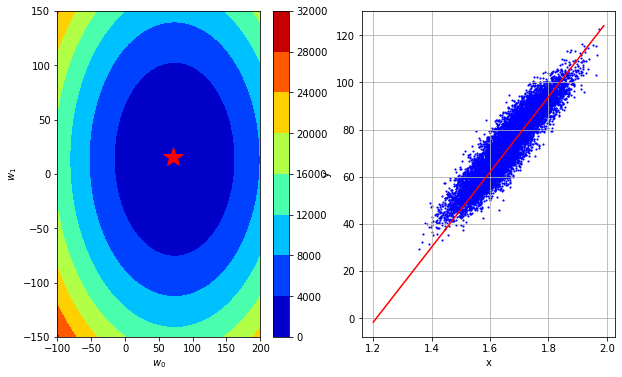

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving


We have issues caused by the granularity of the grid search. 10 * 10 is not a lot.

10 fit: Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds

50 fit: Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.233 seconds

more values make better results, but it's remarkably more expensive.

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - tx @ np.asarray(w)
    N = tx.shape[0]
    gradient = - 1/N * tx.T @ e
    return gradient
np.linalg.norm(compute_gradient(y,tx,np.array([50, 100])))
# 100-20: [26.706078    6.52028757] norm 27.490521129292492
# 50-10: [-23.293922    -3.47971243] norm 23.552392678247735

89.60115491762572

The norm gives us the steepness of the curve, the vector is the direction to the minimum


Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=7.3293922002105205, w1=1.3479712434988973
Gradient Descent(1/49): loss=2264.635056030003, w0=13.925845180399985, w1=2.561145362647904
Gradient Descent(2/49): loss=1837.27771407938, w0=19.862652862570506, w1=3.6530020698820134
Gradient Descent(3/49): loss=1491.1182670993755, w0=25.205779776523972, w1=4.6356731063927095
Gradient Descent(4/49): loss=1210.729115045572, w0=30.01459399908209, w1=5.520077039252336
Gradient Descent(5/49): loss=983.6139018819912, w0=34.3425267993844, w1=6.316040578826003
Gradient Descent(6/49): loss=799.6505792194903, w0=38.23766631965648, w1=7.032407764442302
Gradient Descent(7/49): loss=650.6402878628646, w0=41.74329188790136, w1=7.677138231496973
Gradient Descent(8/49): loss=529.941951863998, w0=44.89835489932174, w1=8.257395651846178
Gradient Descent(9/49): loss=432.176299704916, w0=47.73791160960008, w1=8.779627330160462
Gradient Descent(10/49): loss=352.98612145605955, w0=50.293512648850594, w1=9.24963584

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - tx @ np.asarray(w)
    N = tx.shape[0]
    gradient = - 1/N * tx.T @ e
    return gradient


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        small_y, small_tx = batch_iter(y, tx, batch_size).__next__()
        small_y, small_tx = np.asarray(small_y), np.asarray(small_tx)
        #small_y = np.zeros([0])
        #for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        #    small_y = np.append(small_y,minibatch_y)
        #    print(minibatch_y)
        #print(small_y)
        loss = compute_loss(small_y, small_tx, w)
        gradient = compute_stoch_gradient(small_y, small_tx, w)

        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 3

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=3461.449525038572, w0=57.23362912885602, w1=31.056159108223618
Stochastic Gradient Descent(1/49): loss=305.6729343269742, w0=68.9088268608575, w1=22.273433858718953
Stochastic Gradient Descent(2/49): loss=23.38562833304363, w0=71.6746578858043, w1=20.457983318369045
Stochastic Gradient Descent(3/49): loss=13.231498195471678, w0=74.4894148734279, w1=20.675881361644095
Stochastic Gradient Descent(4/49): loss=44.46539707140182, w0=68.38377227761464, w1=12.211558835651788
Stochastic Gradient Descent(5/49): loss=17.734436980425397, w0=72.29140332462165, w1=13.770296247449789
Stochastic Gradient Descent(6/49): loss=0.626333200178076, w0=72.15688039406966, w1=13.75994313401602
Stochastic Gradient Descent(7/49): loss=5.385339838230333, w0=69.96736003742137, w1=15.546951952796046
Stochastic Gradient Descent(8/49): loss=11.667236837428815, w0=69.61692207941644, w1=12.523878427622865
Stochastic Gradient Descent(9/49): loss=2.0500369796982665, w0=70.37877453

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5

In [14]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [15]:
def computeGD():
    from plots import gradient_descent_visualization

    # Define the parameters of the algorithm.
    max_iters = 50
    gamma = 0.1

    # Initialization
    w_initial = np.array([0, 0])

    # Start gradient descent.
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
    def plot_figure(n_iter):
        fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
        fig.set_size_inches(10.0, 6.0)

    interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
computeGD()

Gradient Descent(0/49): loss=2869.835114535854, w0=7.406780585492638, w1=1.1034894865989184
Gradient Descent(1/49): loss=2337.0932814935354, w0=14.072883112436012, w1=2.096630024537945
Gradient Descent(2/49): loss=1905.572396729258, w0=20.072375386685046, w1=2.9904565086830694
Gradient Descent(3/49): loss=1556.0404800701936, w0=25.471918433509178, w1=3.794900344413678
Gradient Descent(4/49): loss=1272.9196275763516, w0=30.3315071756509, w1=4.518899796571227
Gradient Descent(5/49): loss=1043.5917370563393, w0=34.705137043578446, w1=5.170499303513019
Gradient Descent(6/49): loss=857.8361457351293, w0=38.64140392471324, w1=5.7569388597606315
Gradient Descent(7/49): loss=707.3741167649495, w0=42.18404411773455, w1=6.284734460383483
Gradient Descent(8/49): loss=585.4998732991037, w0=45.372420291453736, w1=6.759750500944048
Gradient Descent(9/49): loss=486.7817360917684, w0=48.241958847801, w1=7.187264937448557
Gradient Descent(10/49): loss=406.82004495382694, w0=50.82454354851354, w1=7.5720

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [46]:
def compute_subgradient(y, tx, w):
    e = y - tx @ np.asarray(w)
    N = tx.shape[0]
    gradient = np.mean(np.array([-np.sign(e), -(np.sign(e)) * tx[:,1]]),axis=1)
    # gradient = np.array([-np.sum(np.sign(e)), -(np.sign(e)) @ tx[:,1]]) * 1/N
    return gradient
compute_subgradient(y, tx, w_initial)

array([-1.00000000e+00, -1.12561225e-15])

In [47]:
def gradient_descent_sub(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w, True)
        gradient = compute_subgradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [51]:
def computeGDSub():
    from plots import gradient_descent_visualization

    # Define the parameters of the algorithm.
    max_iters = 100
    gamma = 1.3

    # Initialization
    w_initial = np.array([0, 0])

    # Start gradient descent.
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = gradient_descent_sub(y, tx, w_initial, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
    def plot_figure(n_iter):
        fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
        fig.set_size_inches(10.0, 6.0)

    interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
computeGDSub()

[0 0]
Gradient Descent(0/99): loss=37.03390292746319, w0=1.3, w1=1.4632959310703054e-15
[1.30000000e+00 1.46329593e-15]
Gradient Descent(1/99): loss=36.38390292746319, w0=2.6, w1=2.926591862140611e-15
[2.60000000e+00 2.92659186e-15]
Gradient Descent(2/99): loss=35.733902927463184, w0=3.9000000000000004, w1=4.389887793210917e-15
[3.90000000e+00 4.38988779e-15]
Gradient Descent(3/99): loss=35.08390292746319, w0=5.2, w1=5.853183724281222e-15
[5.20000000e+00 5.85318372e-15]
Gradient Descent(4/99): loss=34.43390292746319, w0=6.5, w1=7.316479655351527e-15
[6.50000000e+00 7.31647966e-15]
Gradient Descent(5/99): loss=33.78390292746319, w0=7.8, w1=8.779775586421832e-15
[7.80000000e+00 8.77977559e-15]
Gradient Descent(6/99): loss=33.13390292746319, w0=9.1, w1=1.0243071517492137e-14
[9.10000000e+00 1.02430715e-14]
Gradient Descent(7/99): loss=32.483902927463184, w0=10.4, w1=1.1706367448562442e-14
[1.04000000e+01 1.17063674e-14]
Gradient Descent(8/99): loss=31.83390292746319, w0=11.700000000000001

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

In [52]:
def stochastic_sub_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        small_y, small_tx = batch_iter(y, tx, batch_size).__next__()
        small_y, small_tx = np.asarray(small_y), np.asarray(small_tx)
        loss = compute_loss(small_y, small_tx, w)
        gradient = compute_subgradient(small_y, small_tx, w)

        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Sub-Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [54]:
def computeSGDSub():
    from plots import gradient_descent_visualization

    # Define the parameters of the algorithm.
    max_iters = 100
    gamma = 1.3

    # Initialization
    w_initial = np.array([0, 0])

    # Start gradient descent.
    start_time = datetime.datetime.now()
    gradient_losses, gradient_ws = stochastic_sub_gradient_descent(y, tx, w_initial, 1, max_iters, gamma)
    end_time = datetime.datetime.now()

    # Print result
    exection_time = (end_time - start_time).total_seconds()
    print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
    def plot_figure(n_iter):
        fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
        fig.set_size_inches(10.0, 6.0)

    interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))
computeSGDSub()

Stochastic Sub-Gradient Descent(0/99): loss=5022.398023257965, w0=1.3, w1=2.530824020013244
Stochastic Sub-Gradient Descent(1/99): loss=3905.6411326161756, w0=2.6, w1=3.1770485347383
Stochastic Sub-Gradient Descent(2/99): loss=3300.63376869048, w0=3.9000000000000004, w1=4.317175302439526
Stochastic Sub-Gradient Descent(3/99): loss=2871.97444101601, w0=5.2, w1=5.1503992316111304
Stochastic Sub-Gradient Descent(4/99): loss=2408.103426817334, w0=6.5, w1=4.000565657270133
Stochastic Sub-Gradient Descent(5/99): loss=2070.1723220028553, w0=7.8, w1=3.795956583063044
Stochastic Sub-Gradient Descent(6/99): loss=983.3326551570619, w0=9.1, w1=2.5319866817017473
Stochastic Sub-Gradient Descent(7/99): loss=1291.1996774337736, w0=10.4, w1=1.8164589925209382
Stochastic Sub-Gradient Descent(8/99): loss=2785.673019268923, w0=11.700000000000001, w1=2.956585760222164
Stochastic Sub-Gradient Descent(9/99): loss=3212.279583732867, w0=13.000000000000002, w1=4.9857455725414965
Stochastic Sub-Gradient Descent

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…